# LDA – Wine Quality (Vin rouge)

Ce notebook applique **LDA (Linear Discriminant Analysis)** selon les bonnes pratiques ML :
- Réduction de dimension **supervisée** (utilise les labels quality)
- Maximisation de la séparation entre classes
- Alternative à PCA pour la visualisation orientée classification
- Complément important : PCA = non supervisé, LDA = supervisé

## 1. Imports et configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
_roots = [os.getcwd(), os.path.join(os.getcwd(), '..'), os.path.join(os.getcwd(), '..', '..')]
for _r in _roots:
    _p = os.path.join(os.path.abspath(_r), 'src', 'preprocessing.py')
    if os.path.isfile(_p):
        ROOT = os.path.abspath(_r)
        sys.path.insert(0, os.path.join(ROOT, 'src'))
        break
else:
    raise FileNotFoundError("Dossier 'src' introuvable.")
from preprocessing import load_data, clean_data, scale_features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import mlflow

mlflow.set_experiment("wine-quality-lda")

2026/02/14 17:30:51 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/14 17:30:51 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/14 17:30:51 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/14 17:30:51 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/14 17:30:51 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/14 17:30:51 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/14 17:30:52 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/14 17:30:52 INFO alembic.runtime.migration: Will assume non-transactional DDL.


<Experiment: artifact_location='file:///C:/Users/pc/Desktop/ML-project/reduction/mlruns/4', creation_time=1771083060414, experiment_id='4', last_update_time=1771083060414, lifecycle_stage='active', name='wine-quality-lda', tags={}>

## 2. Chargement et preprocessing

In [2]:
df = load_data(os.path.join(ROOT, "dataset", "winequality-red.csv"))
df = clean_data(df)

X = df.drop(columns=["quality"])
y = df["quality"]

X_scaled, scaler = scale_features(X)

# LDA nécessite au plus min(n_features, n_classes-1) composantes
n_classes = len(np.unique(y))
print(f"Nombre de classes (notes): {n_classes}")
print(f"Composantes LDA max: min(11, {n_classes}-1) = {min(11, n_classes-1)}")

Nombre de classes (notes): 6
Composantes LDA max: min(11, 6-1) = 5


## 3. Application LDA

In [3]:
n_components = min(2, X_scaled.shape[1], n_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda = lda.fit_transform(X_scaled, y)

print(f"Variance expliquée par composante: {lda.explained_variance_ratio_}")
print(f"Variance cumulée: {lda.explained_variance_ratio_.sum():.2%}")

Variance expliquée par composante: [0.83994531 0.11142196]
Variance cumulée: 95.14%


## 4. Visualisation 2D

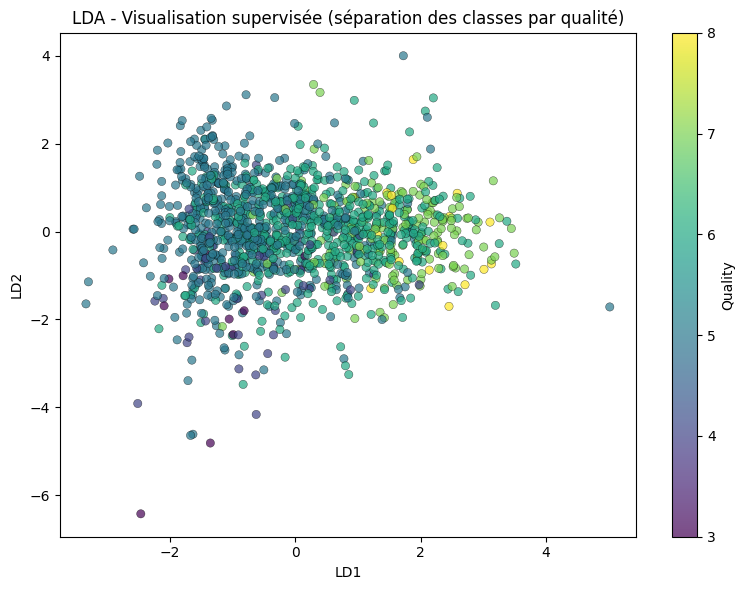

In [4]:
plt.figure(figsize=(8, 6))
x_plot = X_lda[:, 0]
y_plot = X_lda[:, 1] if X_lda.shape[1] > 1 else np.zeros_like(X_lda[:, 0])
scatter = plt.scatter(x_plot, y_plot, c=y, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.3)
plt.colorbar(scatter, label='Quality')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA - Visualisation supervisée (séparation des classes par qualité)')
plt.tight_layout()
plt.savefig('lda_2d.png')
plt.show()

## 5. MLflow tracking

In [5]:
with mlflow.start_run(run_name="LDA_2components"):
    mlflow.log_param("n_components", int(n_components))
    mlflow.log_metric("explained_variance_ratio", float(lda.explained_variance_ratio_.sum()))
    if os.path.exists('lda_2d.png'):
        mlflow.log_artifact('lda_2d.png')
    print("MLflow run terminé")

MLflow run terminé
